# WA Databreaches Data Analysis

## Imports
***

In [16]:
# imports
import pandas as pd
import numpy as np
import scipy.stats as st
import math
import matplotlib.pyplot as plt
import seaborn as sns
from random import choices
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import statsmodels.api as sm
import sys


In [17]:
# autoreload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
# path relative to your notebook
sys.path.insert(0, '../src')

# import as usual
from cleaning import use_dataframe
import analysis as an

## Cleaning
***

In [19]:
filepath = '../data/WA_Databreach_20231102.csv'
cleandf = use_dataframe(filepath)

c:\Users\RGBMonster\galvanize\daimil10\projects\Capstone_Repos\WA_State_Databreach_LinReg_HypothTesting_Analysis\notebooks\../src\cleaning.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleandf.loc[:, 'CyberattackType'][(cleandf['DataBreachCause'] == 'Cyberattack')
c:\Users\RGBMonster\galvanize\daimil10\projects\Capstone_Repos\WA_State_Databreach_LinReg_HypothTesting_Analysis\notebooks\../src\cleaning.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[f'{x}'] = pd.to_datetime(dataframe[f'{x}']).dt.date
c:\Users\RGBMonster\galvanize\daimil10\proj

## Analysis
***

### Hypothesis Testing

Ttest_indResult(statistic=121.20894035771353, pvalue=0.0)

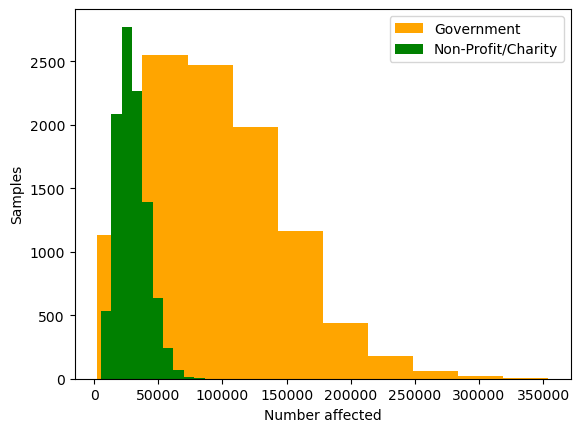

In [20]:
an.hypothesis_test(cleandf, 'IndustryType', 'Government', 'Non-Profit/Charity', samples=10000, startdate = None, enddate=None, rate='n', alt='greater')

Ttest_indResult(statistic=-248.84459882872125, pvalue=0.0)

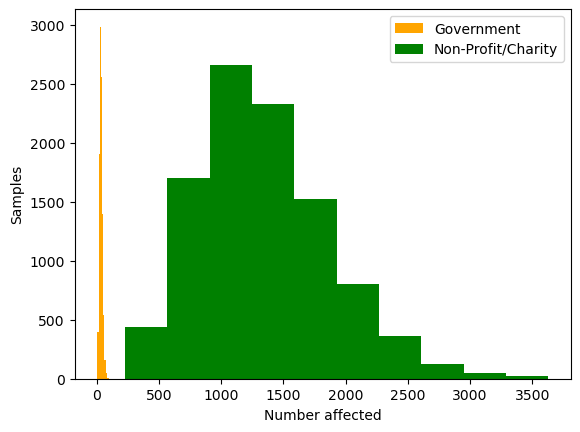

In [21]:
start = dt.date(2018,1,1)
end = dt.date(2023,12,30)
an.hypothesis_test(cleandf, 'IndustryType', 'Government', 'Non-Profit/Charity', samples=10000, startdate = start, enddate= end, rate='y', alt='less')

### Linear Regression

In [22]:
grouped_years = cleandf[['ActualYears', 'WashingtoniansAffected']].groupby('ActualYears')

num_affected = grouped_years.sum()

num_incidents = grouped_years.count()
num_incidents['Number Of Incidents'] = num_incidents['WashingtoniansAffected']
num_incidents.drop('WashingtoniansAffected', axis=1, inplace=True)

In [23]:
X = num_incidents['Number Of Incidents']
y = num_affected['WashingtoniansAffected']

In [24]:
X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
predictions = model.predict(X)
res = model.resid

model.summary()

c:\Users\RGBMonster\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     WashingtoniansAffected   R-squared:                       0.767
Model:                                OLS   Adj. R-squared:                  0.748
Method:                     Least Squares   F-statistic:                     39.52
Date:                    Tue, 14 Nov 2023   Prob (F-statistic):           4.03e-05
Time:                            14:28:47   Log-Likelihood:                -210.12
No. Observations:                      14   AIC:                             424.2
Df Residuals:                          12   BIC:                             425.5
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.178e+04   3.14e+05      0.069      0.946   -6.63e+05    7.07e+05
Number Of Incidents  2.256e+04   3589.514      6.286      0.000    1.47e+04    3.04e+04
==============================================================================
Omnibus:                       15.527   Durbin-Watson:                   2.600
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.542
Skew:                           1.784   Prob(JB):                      0.00312
Kurtosis:                       5.656   Cond. No.                         119.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [26]:
an.cross_val(X_train, y_train, 5)

train_fold1 has an rmse of:514193.68913503335
train_fold2 has an rmse of:918629.595665861
train_fold3 has an rmse of:539325.9363746133
train_fold4 has an rmse of:1845093.4854973059
train_fold5 has an rmse of:38827.30259807632
The mean rmse is: 771214.001854178


In [27]:
X_test

,const,Number Of Incidents
ActualYears,,
2013.0,1.0,3


In [28]:
y_test

ActualYears
2013.0    93948.0
Name: WashingtoniansAffected, dtype: float64

In [29]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred

array([88826.18752715])

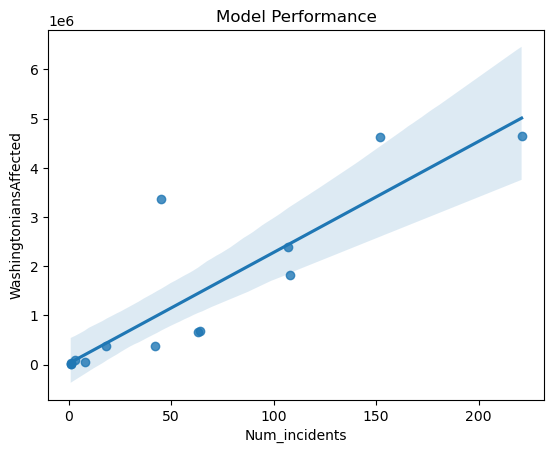

In [39]:
an.create_display_model(cleandf)

### Plotting

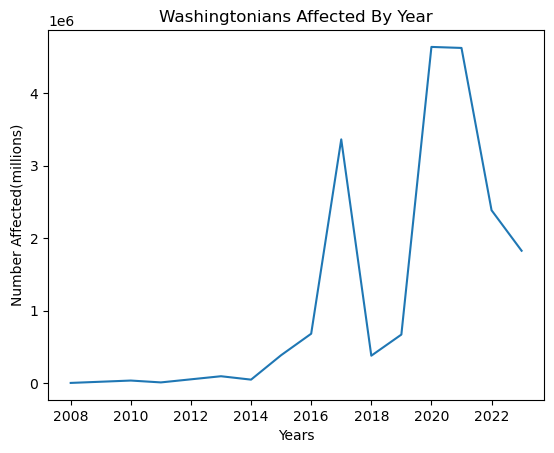

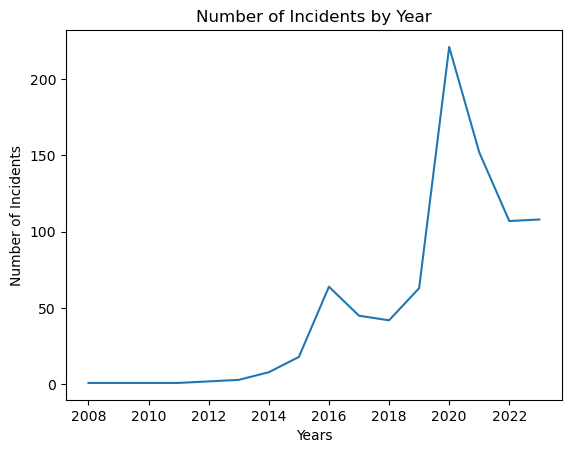

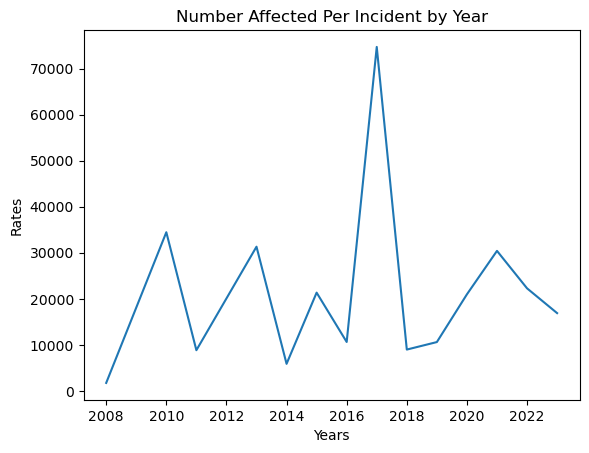

In [ ]:
an.plot_years(cleandf)

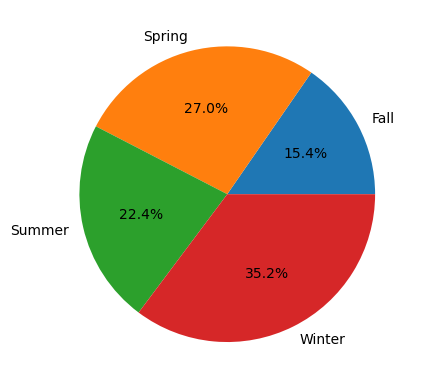

In [ ]:
an.seasons(cleandf)